## Visualize training curve for optimal bVAE

In [24]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(readr))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))

In [25]:
# Set file paths
training_file <- file.path("..", "results", "training_history.csv")
tc_training_file <- file.path("..", "results", "training_history_tc.csv")
output_file <- file.path("figures", "optimal_beta_vae_training_curves.png")
tc_output_file <- file.path("figures", "optimal_beta_tc_vae_training_curves.png")

In [26]:
# Load and process beta vae training history (in preparation for plotting)
train_df <- readr::read_csv(
    training_file, col_types = readr::cols(.default="d")
) %>%
    dplyr::mutate(epoch = dplyr::row_number()) %>%
    dplyr::select(loss, val_loss, test_loss, epoch) %>%
    reshape2::melt(
        id.vars = "epoch",
        value.vars = c("loss", "val_loss", "test_loss"),
        value.name = "loss",
        variable.name = "loss_type"
    )

print(dim(train_df))
head(train_df, 3)

# Load and process beta tc vae training history (in preparation for plotting)
tc_train_df <- readr::read_csv(
    tc_training_file, col_types = readr::cols(.default="d")
) %>%
    dplyr::mutate(epoch = dplyr::row_number()) %>%
    dplyr::select(loss, val_loss, test_loss, epoch) %>%
    reshape2::melt(
        id.vars = "epoch",
        value.vars = c("loss", "val_loss", "test_loss"),
        value.name = "loss",
        variable.name = "loss_type"
    )

print(dim(tc_train_df))
head(tc_train_df, 3)

[1] 1977    3


,epoch,loss_type,loss
,<int>,<fct>,<dbl>
1,1,loss,201.8476
2,2,loss,186.2224
3,3,loss,179.3230


[1] 2142    3


,epoch,loss_type,loss
,<int>,<fct>,<dbl>
1,1,loss,955.6822
2,2,loss,611.7300
3,3,loss,265.4652


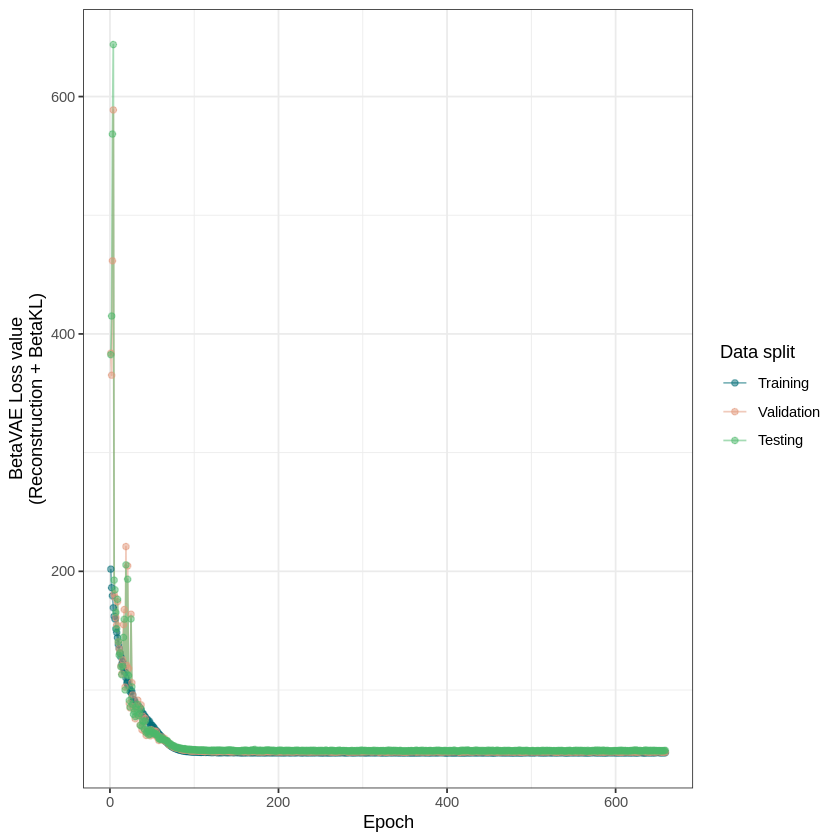

In [27]:
# Visualize the training curves
curve_labels <- c(
  "loss" = "Training", "val_loss" = "Validation", "test_loss" = "Testing"
)
curve_colors <- c(
  "loss" = "#006D77", "val_loss" = "#E29578", "test_loss" = "#4db86a"
)
xlab_ <- "Epoch"
alpha_val <- 0.5
point_size <- 0.7

full_gg <- (
    ggplot(train_df, aes(x = epoch, y = loss, color = loss_type))
    + geom_line(alpha = alpha_val)
    + geom_point(alpha = alpha_val)
    + theme_bw()
    + scale_color_manual(
        name = "Data split",
        labels = curve_labels,
        values = curve_colors
    )
    + xlab(xlab_)
    + ylab("BetaVAE Loss value\n(Reconstruction + BetaKL)")
)

full_gg

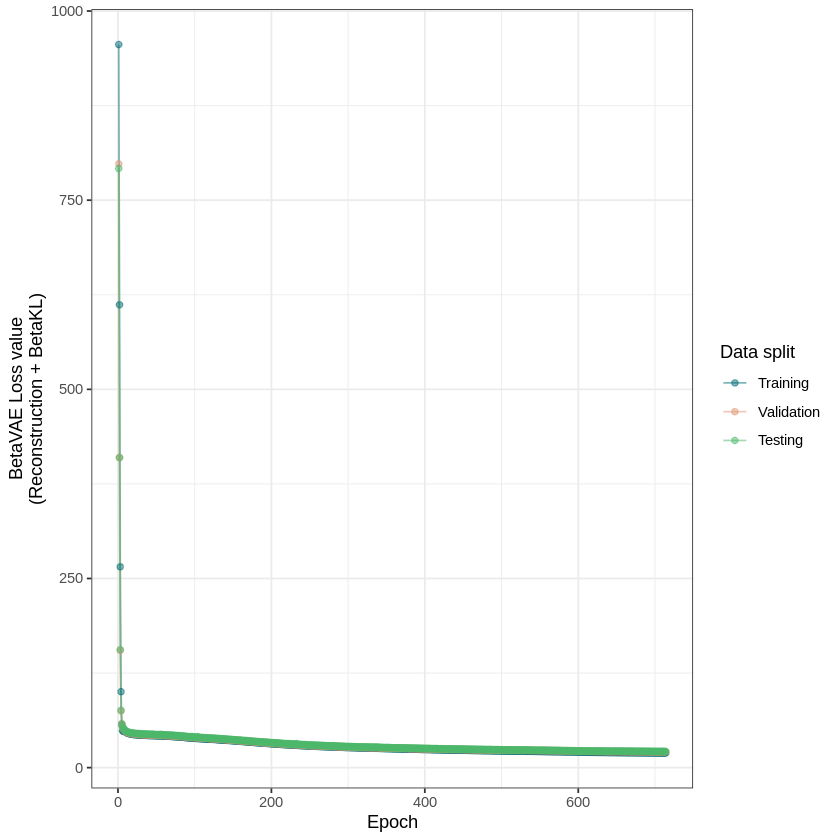

In [28]:
tc_full_gg <- (
    ggplot(tc_train_df, aes(x = epoch, y = loss, color = loss_type))
    + geom_line(alpha = alpha_val)
    + geom_point(alpha = alpha_val)
    + theme_bw()
    + scale_color_manual(
        name = "Data split",
        labels = curve_labels,
        values = curve_colors
    )
    + xlab(xlab_)
    + ylab("BetaVAE Loss value\n(Reconstruction + BetaKL)")
)

tc_full_gg

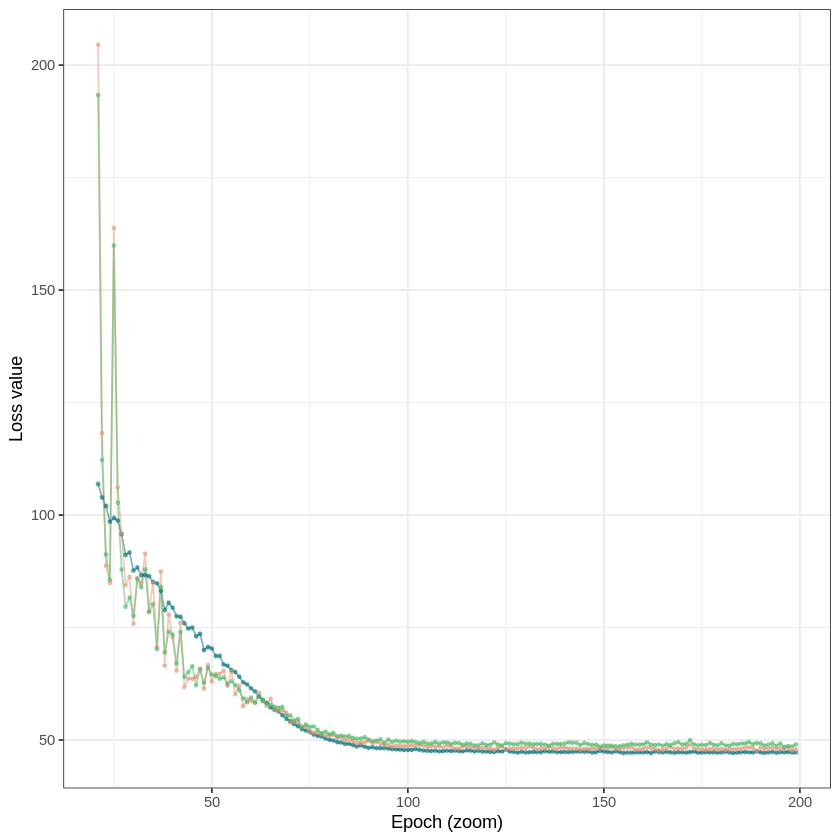

In [29]:
zoom_gg <- (
    ggplot(
        train_df %>%
            dplyr::filter(epoch > 20, epoch < 200),
        aes(x = epoch, y = loss, color = loss_type)
    )
    + geom_line(alpha = alpha_val, show.legend = FALSE)
    + geom_point(alpha = alpha_val, size = point_size, show.legend = FALSE)
    + theme_bw()
    + scale_color_manual(
        name = "",
        labels = curve_labels,
        values = curve_colors
    )
    + xlab(paste(xlab_, "(zoom)"))
    + ylab("Loss value")
)

zoom_gg

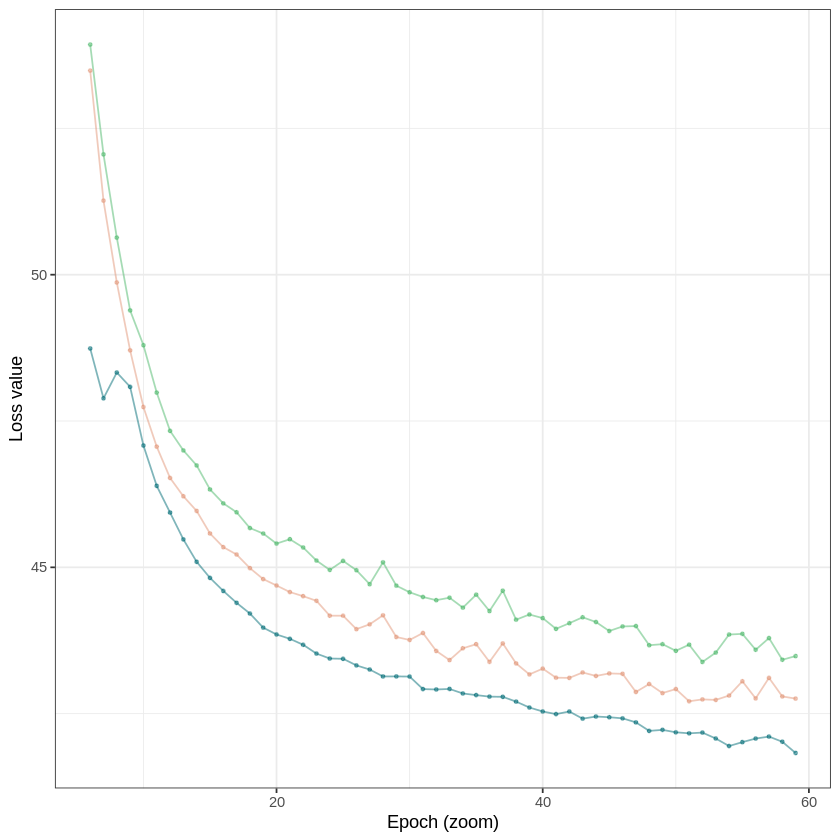

In [30]:
tc_zoom_gg <- (
    ggplot(
        tc_train_df %>%
            dplyr::filter(epoch > 5, epoch < 60),
        aes(x = epoch, y = loss, color = loss_type)
    )
    + geom_line(alpha = alpha_val, show.legend = FALSE)
    + geom_point(alpha = alpha_val, size = point_size, show.legend = FALSE)
    + theme_bw()
    + scale_color_manual(
        name = "",
        labels = curve_labels,
        values = curve_colors
    )
    + xlab(paste(xlab_, "(zoom)"))
    + ylab("Loss value")
)

tc_zoom_gg

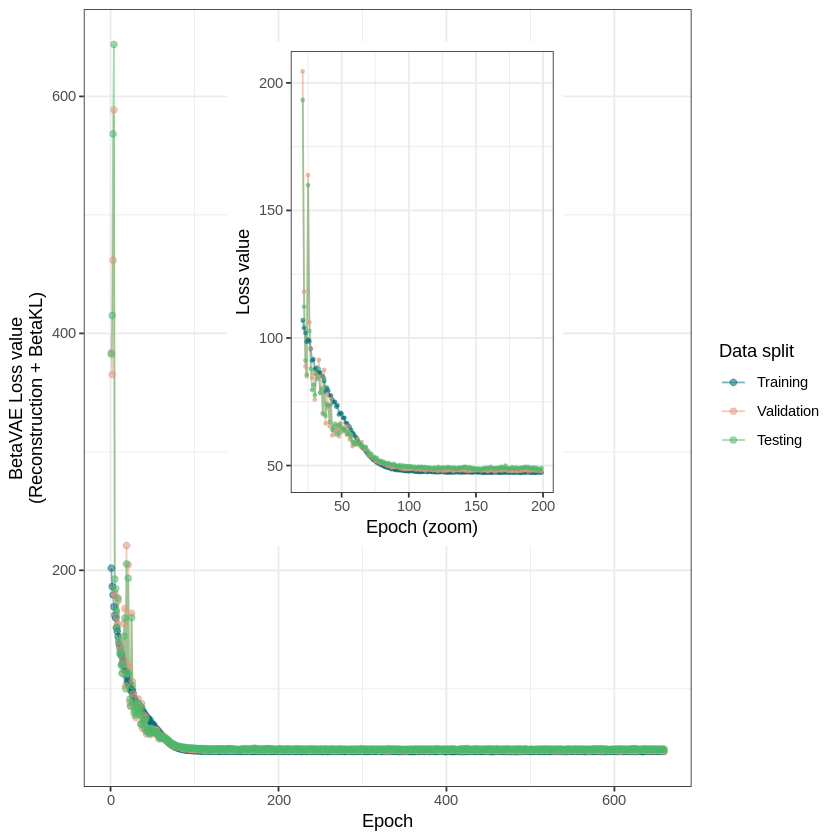

In [31]:
#Combine plots
combined_gg <- cowplot::ggdraw() +
  cowplot::draw_plot(full_gg, 0, 0, 1, 1) +  # Draw the full plot
  cowplot::draw_plot(zoom_gg, 0.27, 0.35, 0.4, 0.6)  # Draw the zoom plot on top

# Save the combined plot
ggsave(output_file, combined_gg, width = 4, height = 2.2, dpi = 500)

# Display the combined plot
combined_gg

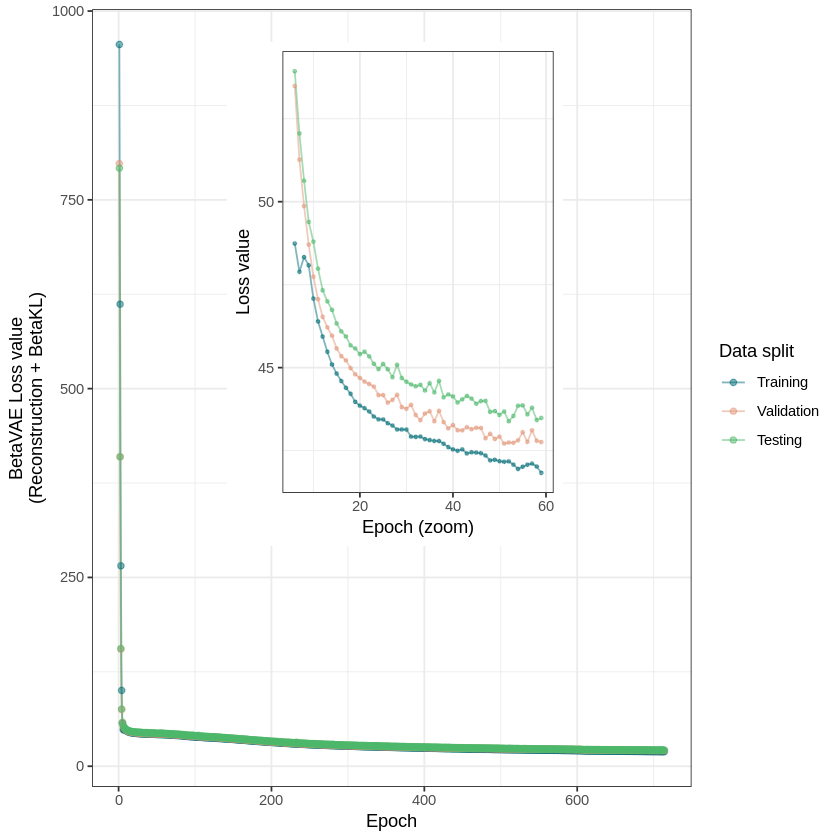

In [32]:
#Combine plots tc
tc_combined_gg <- cowplot::ggdraw() +
  cowplot::draw_plot(tc_full_gg, 0, 0, 1, 1) +  # Draw the full plot
  cowplot::draw_plot(tc_zoom_gg, 0.27, 0.35, 0.4, 0.6)  # Draw the zoom plot on top

# Save the combined plot
ggsave(tc_output_file, tc_combined_gg, width = 4, height = 2.2, dpi = 500)

# Display the combined plot
tc_combined_gg